In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [95]:
df = pd.read_csv('data.csv')
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


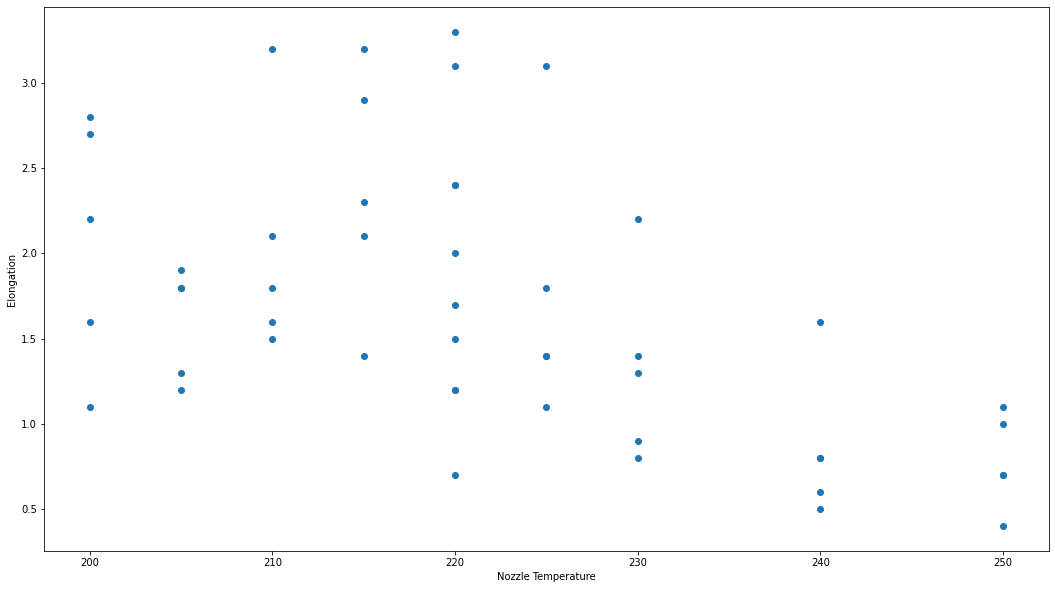

In [96]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['nozzle_temperature'], df['elongation'])
 
# x-axis label
ax.set_xlabel('Nozzle Temperature')
 
# y-axis label
ax.set_ylabel('Elongation')
plt.show()

In [97]:
for i in np.where((df['elongation'] >= 2.5)):
     df.drop(i,inplace=True)

In [98]:
df.shape

(42, 12)

In [99]:
Y= df['elongation'].values
X = df['nozzle_temperature'].values.reshape(-1,1)

In [100]:
import sklearn
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR
regressor = SVR(kernel ='rbf')
regressor.fit(X, Y)

SVR()

In [101]:
model1 = LinearRegression()
lr = model1.fit(X, Y)

In [102]:
# Create 50 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 50)
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = regressor.predict(x_range.reshape(-1, 1)) # SVR
y_lr2 = model1.predict(X.reshape(-1, 1)) # Linear regression
y_svr2 = regressor.predict(X.reshape(-1, 1)) # SVR

In [103]:
# Visualizations
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

In [104]:
fig = px.scatter(df, x=df['nozzle_temperature'], y=df['elongation'], width=600,height=400,
                 opacity=0.9, color_discrete_sequence=['black'])

# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')


# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [105]:
fig.write_image("images/LR_SVR.jpeg")

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error

In [107]:
score = regressor.score(X,Y)

In [108]:
print("R-squared:", score)
print("MSE:", mean_squared_error(Y, y_svr2))

R-squared: 0.4112104104342619
MSE: 0.17332910769024498


In [109]:
score = model1.score(X,Y)
print("R-squared:", score)
print("MSE:", mean_squared_error(Y, y_lr2))

R-squared: 0.35109155851722873
MSE: 0.1910270207355943


For wall thickness vs elongation

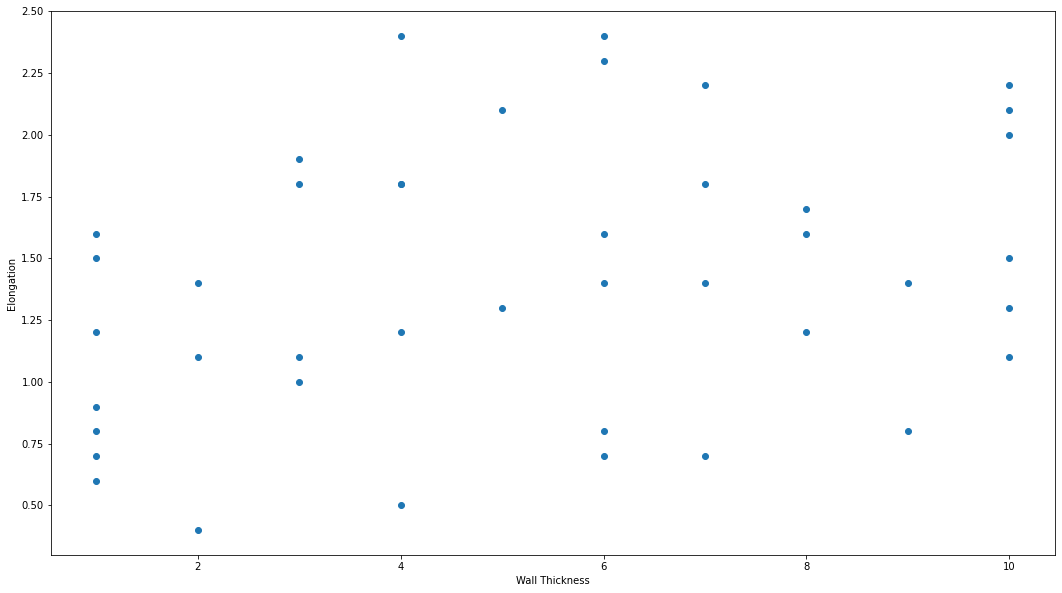

In [110]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['wall_thickness'], df['elongation'])
 
# x-axis label
ax.set_xlabel('Wall Thickness')
 
# y-axis label
ax.set_ylabel('Elongation')
plt.show()

In [111]:
df2 = pd.read_csv("data.csv")

In [112]:
df2['infill_pattern'].replace(['grid','honeycomb'], [0,1], inplace = True)
df2['material'].replace(['abs','pla'], [0,1], inplace = True)

In [113]:
df2.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [114]:
avg = np.mean(df["infill_density"])
avg

50.23809523809524

In [115]:
infill_avg = int(avg)
infill_avg

50

In [116]:
for i in range(50):
    df2["infill_density"].iloc[i]=int(infill_avg)

C:\Users\User\AppData\Local\Temp\ipykernel_13544\2593259373.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
avg = np.mean(df["layer_height"])
avg

0.09166666666666667

In [118]:
for i in range(50):
    df2["layer_height"].iloc[i]=avg

C:\Users\User\AppData\Local\Temp\ipykernel_13544\3233804089.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
#avg3 = np.mean(df["bed_temperature"])
#avg4 = np.mean(df["infill_pattern"])
##avg5 = np.mean(df["material"])
#avg6 = np.mean(df["print_speed"])
#abg7 = np.mean(df["fan_speed"])

In [120]:
Y= df['elongation'].values
X = df['wall_thickness'].values.reshape(-1,1)

In [121]:
regressor.fit(X,Y)

SVR()

In [122]:
model1.fit(X,Y)

LinearRegression()

In [123]:
# Create 50 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 50)
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = regressor.predict(x_range.reshape(-1, 1)) # SVR
y_lr2 = model1.predict(X.reshape(-1, 1)) # Linear regression
y_svr2 = regressor.predict(X.reshape(-1, 1)) # SVR

In [124]:
fig = px.scatter(df, x=df['wall_thickness'], y=df['elongation'], width=600,height=400,
                 opacity=0.9, color_discrete_sequence=['black'])

# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')


# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [125]:
fig.write_image("images/LR_SVR2.jpeg")

In [126]:
score = regressor.score(X,Y)
score

0.15954051065414288

In [127]:
score = model1.score(X,Y)
score

0.10057657317988733